In [1]:
#!/usr/bin/env python
"""mapper.py"""

'mapper.py'

In [2]:
import sys
from math import sqrt

get initial centroids from a txt file and add them in an array

In [8]:
def getCentroids(filepath):
    global x_list
    global y_list
    global x_initial
    global y_initial

    '''
    Mapper function:
        load in coordinates, Centroid, 
        Calculate the distances from each sample to each centroid point
        output relabeled cluster ID as key, Coordinates as value.
    
    '''
    with open('initial6points.txt') as a:
      initial = a.readlines()

    initial = list(map(lambda s: s.strip(), initial))
    x_initial = []
    y_initial = []
    for line in initial:
        Type = line.split(',')
        x = Type[0]
        y = Type[1]
        x_initial.append(x)
        y_initial.append(y)
    
    with open('data_points-1.txt') as f:
      lines = f.readlines()
      
    x_list = []
    y_list = []

    for line in lines:
        Type = line.split(',')
        x = Type[0]
        y = Type[1]
        x_list.append(x)
        y_list.append(y)
      
    x_initial = [float(x) for x in x_initial]
    y_initial = [float(x) for x in y_initial]
    x_list = [float(x) for x in x_list]
    y_list = [float(x) for x in y_list]

    centroids = []
    return centroids

In [4]:
k = 6

create clusters based on initial centroids

In [6]:
def createClusters(centroids):
  distance = []
  cluster = []
  for i in range (k):
    for j in range (len(x_list)):
      distancestep = sqrt((x_list[j] - x_initial[i])**2 + (y_list[j] - y_initial[i])**2)
      distance.append(distancestep)
      if(i == 5):
        if(distance[j] <= min(distance[j+len(x_list)], distance[j+2*len(x_list)], distance[j+3*len(x_list)], distance[j+4*len(x_list)], distance[j+5*len(x_list)])):
          cluster.append(0)
        elif(distance[j+len(x_list)] <= min(distance[j], distance[j+2*len(x_list)], distance[j+3*len(x_list)], distance[j+4*len(x_list)], distance[j+5*len(x_list)])):
          cluster.append(1)
        elif(distance[j+2*len(x_list)] <= min(distance[j], distance[j+len(x_list)], distance[j+3*len(x_list)], distance[j+4*len(x_list)], distance[j+5*len(x_list)])):
          cluster.append(2)
        elif(distance[j+3*len(x_list)] <= min(distance[j], distance[j+len(x_list)], distance[j+2*len(x_list)], distance[j+4*len(x_list)], distance[j+5*len(x_list)])):
          cluster.append(3)
        elif(distance[j+4*len(x_list)] <= min(distance[j], distance[j+len(x_list)], distance[j+2*len(x_list)], distance[j+3*len(x_list)], distance[j+4*len(x_list)])):
          cluster.append(4)
        else:
          cluster.append(5)
  return cluster

On MapReduce (Mapper function), this would return the data points with the closest centroid (0, 1, or 2) attached with the data points.



**Calculating New centroids**

In [9]:
def NewClusters(Cluster_list):

  global cluster_change

  xsum0 = 0
  ysum0 = 0
  count0 = 0
  xsum1 = 0
  ysum1 = 0
  count1 = 0
  xsum2 = 0
  ysum2 = 0
  count2 = 0
  xsum3 = 0
  ysum3 = 0
  count3 = 0
  xsum4 = 0
  ysum4 = 0
  count4 = 0
  xsum5 = 0
  ysum5 = 0
  count5 = 0
  
  clusterx = []
  clustery = []
  cluster1x = []
  cluster1y = []
  cluster2x = []
  cluster2y = []
  cluster3x = []
  cluster3y = []
  cluster4x = []
  cluster4y = []
  cluster5x = []
  cluster5y = []

  for i in range (len(Cluster_list)):
    if(Cluster_list[i] == 0):
      xsum0 = xsum0 + x_list[i]
      ysum0 = ysum0 + y_list[i]
      count0 = count0 + 1
      clusterx.append(x_list[i])
      clustery.append(y_list[i])
    if(Cluster_list[i] == 1):
      xsum1 = xsum1 + x_list[i]
      ysum1 = ysum1 + y_list[i]
      count1 = count1 + 1
      cluster1x.append(x_list[i])
      cluster1y.append(y_list[i])
    if(Cluster_list[i] == 2):
      xsum2 = xsum2 + x_list[i]
      ysum2 = xsum2 + x_list[i]
      count2 = count2 + 1
      cluster2x.append(x_list[i])
      cluster2y.append(x_list[i])
    if(Cluster_list[i] == 3):
      xsum3 = xsum3 + x_list[i]
      ysum3 = xsum3 + x_list[i]
      count3 = count3 + 1
      cluster3x.append(x_list[i])
      cluster3y.append(x_list[i])
    if(Cluster_list[i] == 4):
      xsum4 = xsum4 + x_list[i]
      ysum4 = xsum4 + x_list[i]
      count4 = count4 + 1
      cluster4x.append(x_list[i])
      cluster4y.append(x_list[i])
    if(Cluster_list[i] == 5):
      xsum5 = xsum5 + x_list[i]
      ysum5 = xsum5 + x_list[i]
      count5 = count5 + 1
      cluster5x.append(x_list[i])
      cluster5y.append(x_list[i])
  plt.scatter(clusterx, clustery)
  plt.scatter(cluster1x, cluster1y)
  plt.scatter(cluster2x, cluster2y)
  plt.scatter(cluster3x, cluster3y)
  plt.scatter(cluster4x, cluster4y)
  plt.scatter(cluster5x, cluster5y)  
  plt.scatter(x_initial, y_initial)
  plt.show()
  print("Figure")

  NewX0 = xsum0 / count0
  NewY0 = ysum0 / count0
  NewX1 = xsum1 / count1
  NewY1 = ysum1 / count1
  NewX2 = xsum2 / count2
  NewY2 = ysum2 / count2
  NewX3 = xsum3 / count3
  NewY3 = ysum3 / count3
  NewX4 = xsum4 / count4
  NewY4 = ysum4 / count4
  NewX5 = xsum5 / count5
  NewY5 = ysum5 / count5

  cluster_change = abs(x_initial[0] - NewX0) + abs(x_initial[1] - NewX1) + (x_initial[2] - NewX2) + abs(y_initial[0] - NewY0) +abs(y_initial[1] - NewY1) +abs(y_initial[2] - NewY2) + abs(x_initial[3] - NewX3) + abs(x_initial[4] - NewX4) + (x_initial[5] - NewX5) + abs(y_initial[3] - NewY3) +abs(y_initial[4] - NewY4) +abs(y_initial[5] - NewY5) 
  print(cluster_change)

  NewX0 = str(NewX0)
  NewY0 = str(NewY0)
  NewX1 = str(NewX1)
  NewY1 = str(NewY1)
  NewX2 = str(NewX2)
  NewY2 = str(NewY2)
  NewX3 = str(NewX3)
  NewY3 = str(NewY3)
  NewX4 = str(NewX4)
  NewY4 = str(NewY4)
  NewX5 = str(NewX5)
  NewY5 = str(NewY5)

  NewCent = "{},{}\n{},{}\n{},{}\n{},{}\n{},{}\n{},{}".format(NewX0, NewY0, NewX1, NewY1, NewX2, NewY2, NewX3, NewY3, NewX4, NewY4, NewX5, NewY5)
  file='initial6points.txt' 
  with open(file, 'w') as filetowrite:
      filetowrite.write(NewCent)
  print(NewCent)

On MapReduce (Reducer Function), this will return the new centroid positions and will edit the existing text file.

This function will loop the map and reducer function until iterations or criteria are met

Rep #:
1


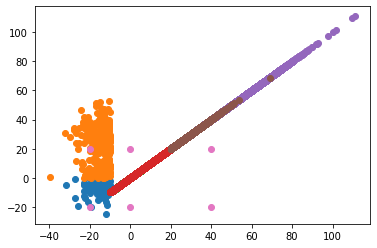

Figure
149.5601209702317
-14.72623274041992,-6.5685315222901535
-14.257665726082035,20.508448604676673
9.817412426077789,9.817444296801614
9.592382054132363,9.591786067269007
42.525289924738736,42.525343831098375
27.621682791352853,27.62583999134092
Rep #:
2


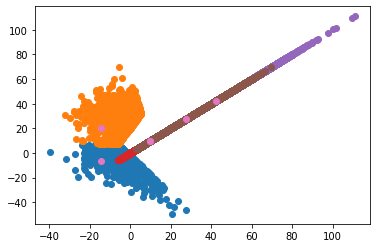

Figure
44.064213748303374
-4.071293287421897,-4.800623641935977
-2.462435185289828,25.61962028903549
20.14138333615459,20.1414057430636
9.485158249247842,9.485318886881752
49.78784986427482,49.787987753045016
34.39926696256989,34.399502969418414
Rep #:
3


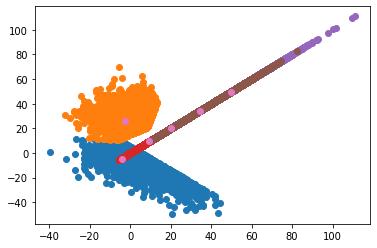

Figure
22.141326760976625
3.2330595423522586,-4.531001452240663
3.9887323742771774,24.053152768566125
32.537348575713665,32.53745360339302
12.179747522321666,12.179782677416437
50.367293135698006,50.367455646769
44.065032886127995,44.066938704921284
Rep #:
4


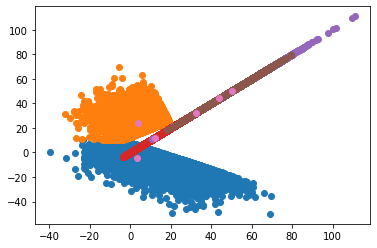

Figure
46.662045509217045
17.016606513202053,-6.320950557201661
7.28272485209764,22.613961508750517
44.325357610533196,44.32581884510557
23.18568874042315,23.185707062518485
52.539433071721795,52.540098936437325
49.9847898955153,49.9850563742901
Rep #:
5


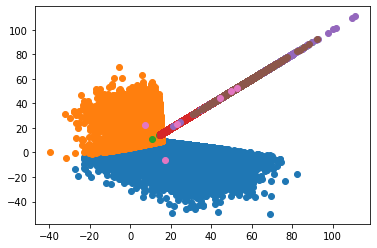

Figure
65.71662561729428
32.89915599193602,0.30377707129565074
9.373367948299407,15.716884603846248
50.042966658038615,50.04313066254412
33.862097792656165,33.86226390639447
58.96127221061493,58.97004352100797
55.28722319162019,55.30466578984605
Rep #:
6


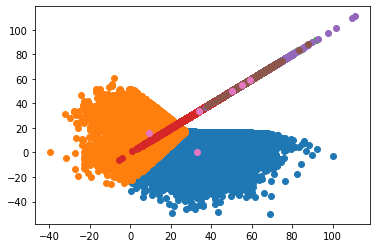

Figure
47.11429859326657
35.174407020760334,1.8597213111210167
9.823049680380166,15.038992092377361
52.64869857758831,52.649540067651664
48.87907038215188,48.87924417396298
64.97238182177958,65.0309674897913
60.53826141179633,60.60456916851938
Rep #:
7


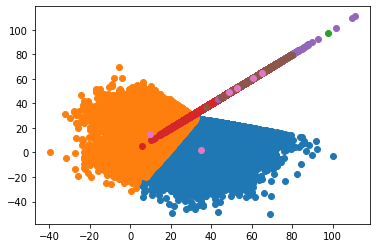

Figure
14.075343074204127
36.07272798963059,3.220440641439278
9.976118028308317,15.105699247642585
59.99579549000598,60.01494344634182
50.04555780053149,50.04572689361334
69.3699859223063,69.66171079158326
64.43008514263697,64.71329616456111
Rep #:
8


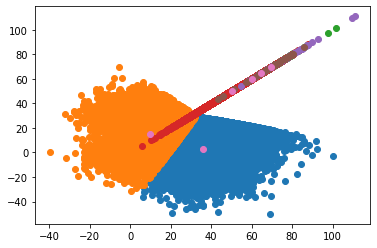

Figure
18.635174114683743
36.525179246223786,3.9158657513013084
9.979829439612725,15.085695653670316
64.64752707303509,64.72423360297441
50.157641433939894,50.157816307639905
76.66817103813125,78.40178800440489
68.90930396916796,70.33610378435893
Rep #:
9


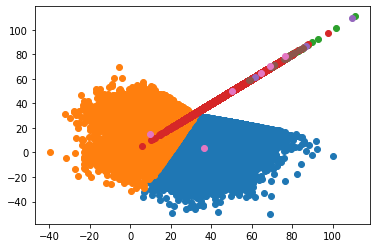

Figure
30.081857630000357
36.71400167218135,4.205501506616736
9.98068959333228,15.072241656404126
67.3745764226512,67.5773515901848
50.18403253240187,50.18421024232964
83.1706588287473,97.65105522157273
73.72495324454763,78.81022967895032
Rep #:
10


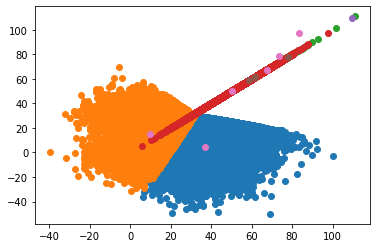

Figure
162.6453815300516
36.79606946221731,4.330883984814583
9.981918505281383,15.06574906824593
69.23819920088187,69.53771824605555
50.1930469992544,50.19322600582505
109.54380257893274,219.08760515786548
66.0328343543542,85.62385275600116
Time:  179.17172948999996


In [10]:
import matplotlib.pyplot as plt
import timeit
start = timeit.default_timer()
i = 0
cluster_change = 100000000
while i < 10 and cluster_change > 2:
  centroids = getCentroids('initial6points.txt')
  Cluster_list = createClusters(centroids)
  print("Rep #:" )
  print(i + 1)
  NewClusters(Cluster_list)
  i = i + 1

stop = timeit.default_timer()
print('Time: ', stop - start)